In [1]:
## required packages for this Chapter
import os, random
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from collections import Counter
import plfit
from scipy.stats import poisson

sns.set_theme()
%matplotlib inline

# To export to PDF, run:
# jupyter nbconvert --to webpdf --allow-chromium-download assignment_01.ipynb

## Problem 3

In [85]:
def get_isolated_edges(g):
    nodes = g.vs.select(_degree=1)
#     print(len(nodes), len(g.subgraph(nodes).es))
    return g.subgraph(nodes).es

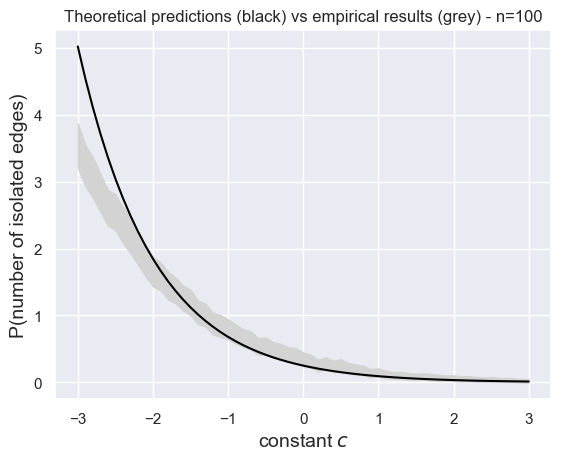

In [107]:
n = 100
REP = 1000 ## repeats
C = np.arange(-3, 3.01,.1)
z = 1.64

# empirical
ic_avg = []
ic_std = []
for c in C:
    x = []
    p = (np.log(n) + np.log(np.log(n)) + c) / (2*n)
    for rep in range(REP):        
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        isolated_edges = get_isolated_edges(g)
        n_isolated_edges = len(isolated_edges)
        x.append(n_isolated_edges)
    ic_avg.append(np.mean(x))
    ic_std.append(np.std(x))

lower_bound = [(m - s * z / np.sqrt(n)) for m,s in zip(ic_avg, ic_std)] 
upper_bound = [(m + s * z / np.sqrt(n)) for m,s in zip(ic_avg, ic_std)] 

## theoretical
th = [np.exp(-c) / 4 for c in C]

## plot
plt.fill_between(C, lower_bound, upper_bound, color='lightgray')
plt.plot(C, th, color='black')
plt.title(f'Theoretical predictions (black) vs empirical results (grey) - n={n}')
plt.xlabel(r'constant $c$', fontsize=14)
plt.ylabel('P(number of isolated edges)', fontsize=14)
plt.show()

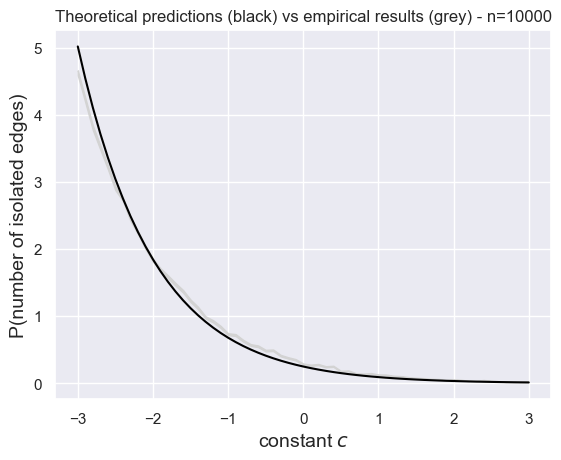

In [108]:
n = 10000
REP = 1000 ## repeats
C = np.arange(-3, 3.01,.1)
z = 1.64

# empirical
ic_avg = []
ic_std = []
for c in C:
    x = []
    p = (np.log(n) + np.log(np.log(n)) + c) / (2*n)
    for rep in range(REP):        
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        isolated_edges = get_isolated_edges(g)
        n_isolated_edges = len(isolated_edges)
        x.append(n_isolated_edges)
    ic_avg.append(np.mean(x))
    ic_std.append(np.std(x))

lower_bound = [(m - s * z / np.sqrt(n)) for m,s in zip(ic_avg, ic_std)] 
upper_bound = [(m + s * z / np.sqrt(n)) for m,s in zip(ic_avg, ic_std)] 

## theoretical
th = [np.exp(-c) / 4 for c in C]

## plot
plt.fill_between(C, lower_bound, upper_bound, color='lightgray')
plt.plot(C, th, color='black')
plt.title(f'Theoretical predictions (black) vs empirical results (grey) - n={n}')
plt.xlabel(r'constant $c$', fontsize=14)
plt.ylabel('P(number of isolated edges)', fontsize=14)
plt.show()

## Problem 6

## Problem 7

## Problem 8